# Lesson4

In [33]:
import torch
t = torch.tensor([1,2,3])
t

tensor([1, 2, 3])

In [7]:
t = t.cuda()
t

tensor([1, 2, 3], device='cuda:0')

# Lesson5

In [8]:
a = [1,2,3,4]

In [9]:
a[2]

3

In [10]:
dd = [
[1,2,3],
[4,5,6],
[7,8,9]
]

In [11]:
dd[0][2]

3

# Lesson6

In [14]:
t = torch.tensor(dd)
t

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [15]:
t.type()

'torch.LongTensor'

In [17]:
t.shape

torch.Size([3, 3])

## tensor's reshape

In [18]:
t.reshape(1,9)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [20]:
t.reshape(1,9).shape

torch.Size([1, 9])

# Lesson7

CNN中 张量的四个维度 [B,C,H,W]
B:批大小，C:颜色通道，H,W：高宽位置

例子:[3,1,28,28]:三张图片，一种颜色通道，高宽各28像素

# Lesson8

In [1]:
import torch
import numpy as np

In [2]:
t = torch.Tensor()
type(t)

torch.Tensor

In [3]:
print(t.dtype)
print(t.device)
print(t.layout)

torch.float32
cpu
torch.strided


## 注解

其中，torch.dtype 是 tensor 的数据类型，torch.device 表明计算设备是 CPU 还是 GPU，torch.layout 表明内存布局（memory layout），即 tensor 在物理设备中的储存结构。学过数据结构的都知道储存结构（物理结构）简单可以分为：顺序储存、链式储存。

torch.layout 可选torch.stried或torch.sparse_coo。分别对应顺序储存、离散储存。

一般说，稠密张量适用torch.stried，稀疏张量（0 比较多）适用torch.sparse_coo

## 数据类型

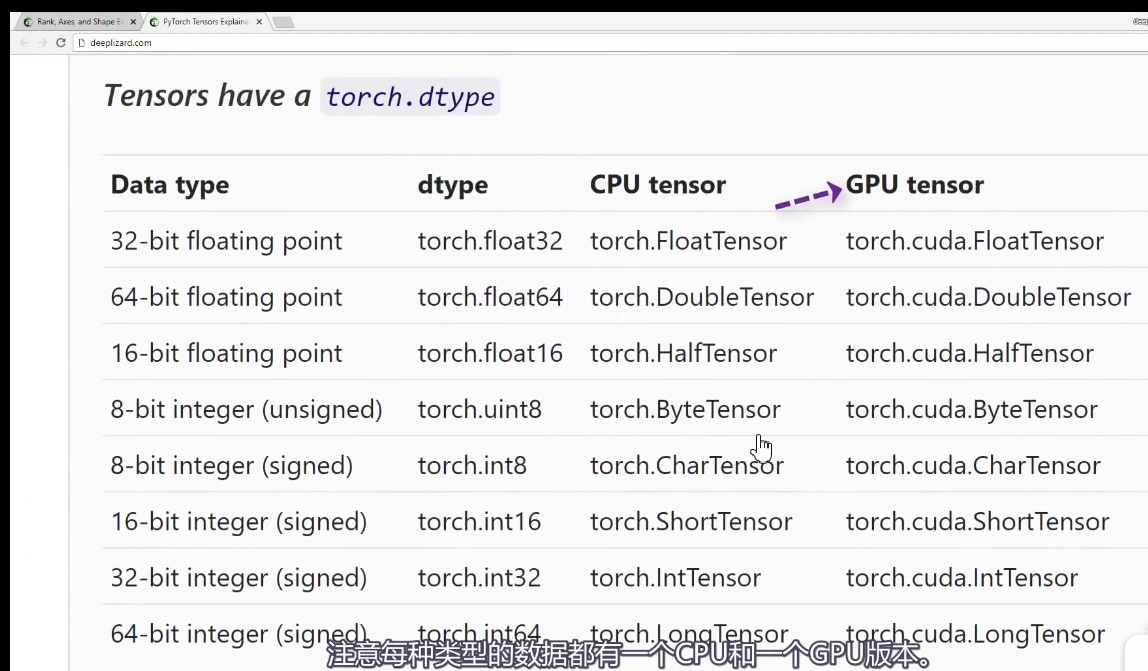

In [4]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

In [6]:
t1 = torch.tensor([1,2,3])
t2 = torch.tensor([1.,2.,3.])

In [7]:
t1.dtype

torch.int64

In [8]:
t2.dtype

torch.float32

两个不同的数据类型不能运算
同个数据类型不在同个设备上也不能运算

## 有数据的创建方式

In [9]:
data = np.array([1,2,3])
type(data)

numpy.ndarray

In [10]:
#构造函数
torch.Tensor(data)

tensor([1., 2., 3.])

In [11]:
torch.tensor(data)

tensor([1, 2, 3], dtype=torch.int32)

In [12]:
torch.as_tensor(data)

tensor([1, 2, 3], dtype=torch.int32)

In [13]:
torch.from_numpy(data)

tensor([1, 2, 3], dtype=torch.int32)

## 无数据的创建方式

In [16]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [17]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [18]:
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [19]:
torch.rand(2,2)

tensor([[0.8903, 0.3464],
        [0.1020, 0.1642]])

# Lesson9

In [21]:
t1 = torch.Tensor(data)
t2 = torch.tensor(data)
t3 = torch.as_tensor(data)
t4 = torch.from_numpy(data)

In [22]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [23]:
print(t1.dtype)
print(t2.dtype)
print(t3.dtype)
print(t4.dtype)

torch.float32
torch.int32
torch.int32
torch.int32


In [24]:
torch.get_default_dtype()

torch.float32

构造函数使用全局缺省值，缺省值为float32

工厂函数根据数据推断类型

工厂函数可以指定数据类型

In [26]:
torch.tensor(np.array([1,2,3]))

tensor([1, 2, 3], dtype=torch.int32)

In [28]:
torch.tensor(np.array([1.,2.,3.]))

tensor([1., 2., 3.], dtype=torch.float64)

In [29]:
torch.tensor(np.array([1,2,3]),dtype=torch.float64)

tensor([1., 2., 3.], dtype=torch.float64)

## sharing or copying

In [31]:
data[0] = 0
data[1] = 0
data[2] = 0

In [32]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
tensor([0, 0, 0], dtype=torch.int32)
tensor([0, 0, 0], dtype=torch.int32)


### copy（新建内存)
t1 = torch.Tensor(data)

t2 = torch.tensor(data)
### share（共享内存）
t3 = torch.as_tensor(data)

t4 = torch.from_numpy(data)

选取顺序
一torch.tensor()
二torch.as_tensor()